In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
import scipy.io
import pandas as pd

In [4]:
import warnings
warnings.filterwarnings('once')

In [32]:
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
seed_everything()

In [5]:
bs = 64

In [6]:
data = scipy.io.loadmat('data/cars_annos.mat')
classes = {i:data['class_names'][0][i][0] for i in range(data['class_names'].shape[1])}
data = data['annotations'][0]

# target =[data[i][-2][0][0] for i in range(data.shape[0])]
# image_id =[data[i][0][0] for i in range(data.shape[0])]
# is_train = [data[i][-1][0][0] for i in range(data.shape[0])]

# df = pd.DataFrame()
# df['filename'] = image_id
# df['target'] = target
# df['is_train'] = is_train

# train_df = df[df.is_train==1]
# test_df = df[df.is_train==0]

# train_df.drop('is_train',axis=1,inplace=True)
# test_df.drop('is_train',axis=1,inplace=True)

# train_df = train_df.sample(frac=1,random_state=10)
# test_df = test_df.sample(frac=1,random_state=10)

# train_df.to_csv('data/train.csv',index=False)
# test_df.to_csv('data/test.csv',index=False)

In [7]:
path = Path('data/')

In [8]:
tfms = get_transforms(do_flip=False)

In [9]:
src = ImageList.from_csv(path,'train.csv').split_by_rand_pct(0.2).label_from_df()

/opt/anaconda3/lib/python3.7/site-packages/fastai/core.py:279: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if not isinstance(a, collections.Sized) and not getattr(a,'__array_interface__',False):


In [11]:
def get_data(sz,bs,tfms=tfms):
    return src.transform(tfms,size=sz).databunch(bs=bs).normalize()

In [12]:
data = get_data(224,bs)

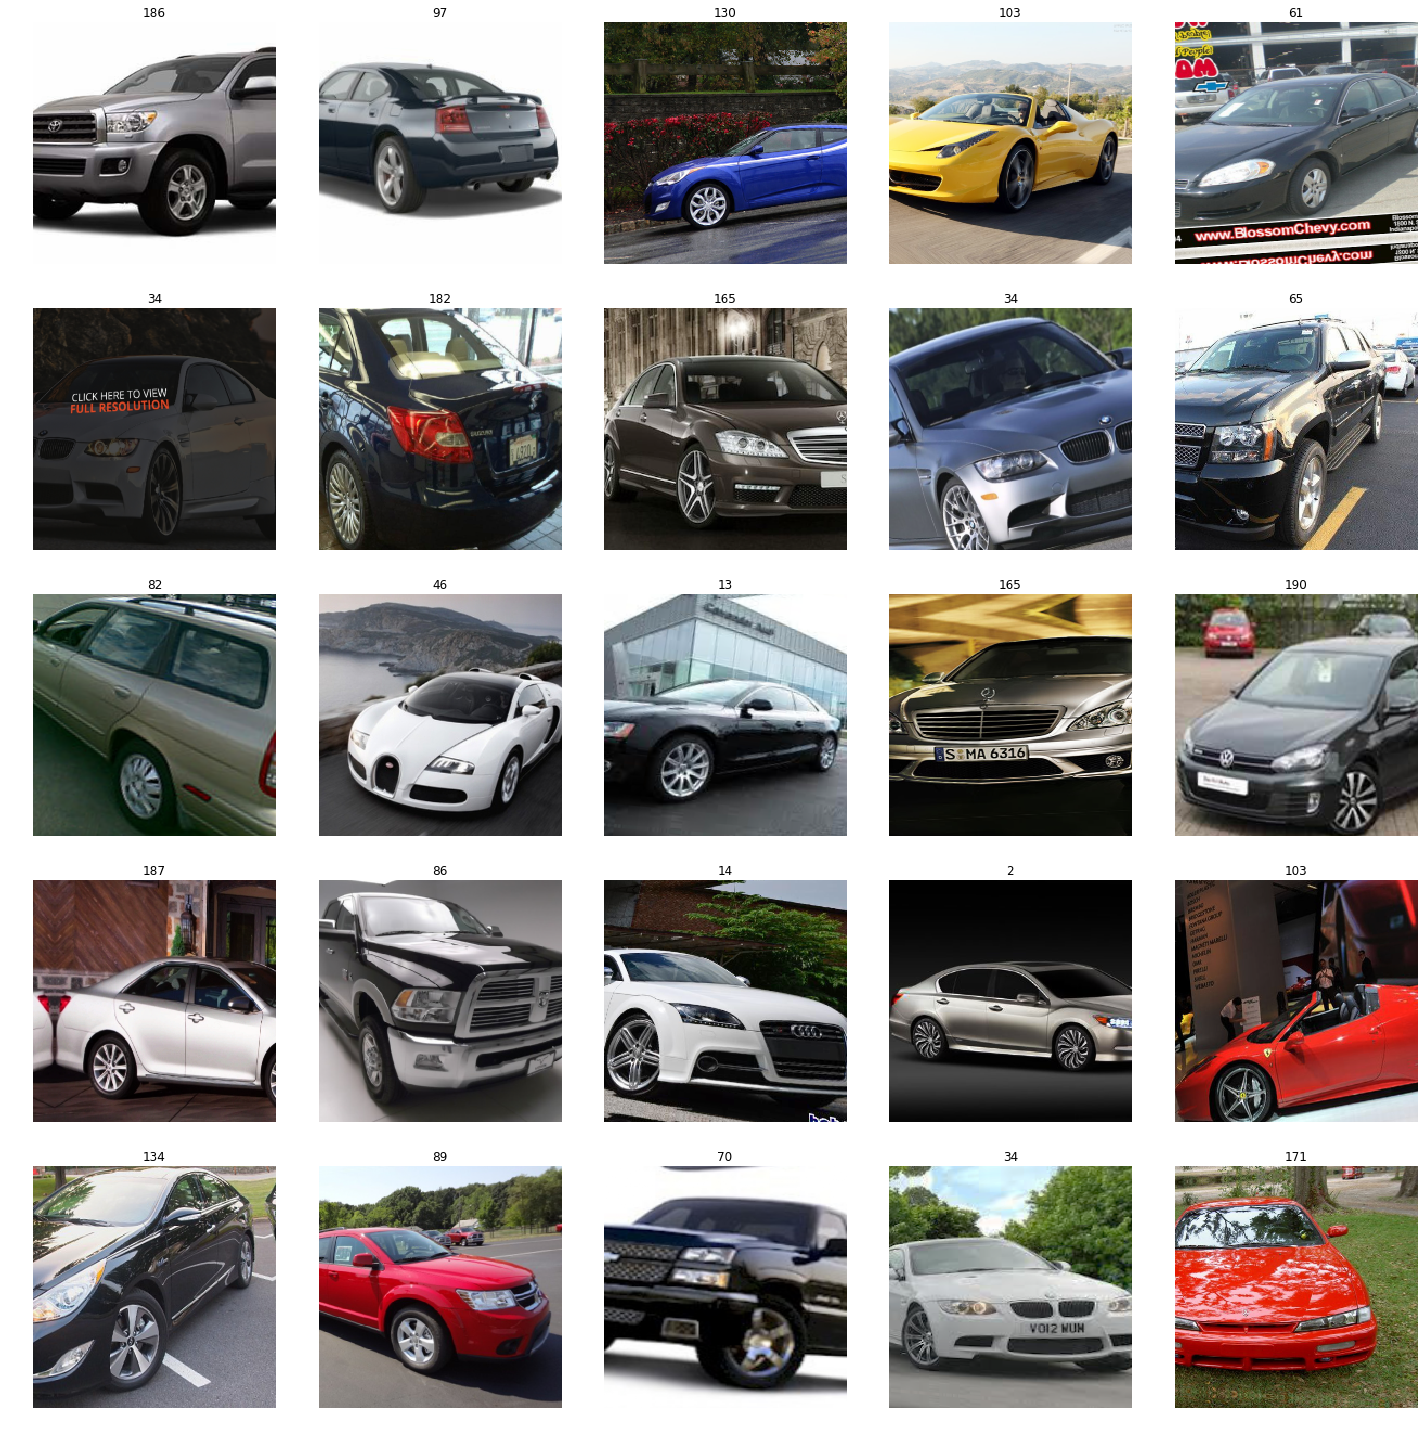

In [13]:
data.show_batch()

In [17]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [33]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [ ]:
learn.fit_one_cycle(5,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.751612,3.684393,0.157338,01:02
1,3.645143,3.097895,0.250000,01:02
2,2.782519,2.215557,0.430348,01:03


In [ ]:
learn.save('stage-1-34')

In [16]:
!ls data/models

resnet34-1-34.pth  stage-1-34.pth  stage-2-34.pth  tmp.pth


In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

In [ ]:
learn.save('stage-2-34')

In [19]:
learn.load('stage-2-34')

/opt/anaconda3/lib/python3.7/site-packages/fastai/basic_train.py:315: ResourceWarning: unclosed file <_io.BufferedWriter name='/home/jupyter/aiforsea/data/models/tmpz8_w3abh'>
  torch.save(state, open(tmp_file, 'wb'))


Learner(data=ImageDataBunch;

Train: LabelList (6433 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
80,111,164,130,147
Path: data;

Valid: LabelList (1608 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
132,97,73,168,98
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inpl

ResNExt

In [33]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


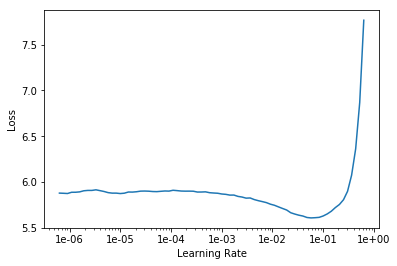

In [25]:
learn.recorder.plot()

In [38]:
learn.fit(3)

epoch,train_loss,valid_loss,accuracy,time
0,2.917950,2.703557,0.342040,01:04
1,2.548319,2.439015,0.381841,01:03
2,2.286164,2.300624,0.419776,01:04


In [34]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,5.104358,4.114002,0.138060,01:03
1,3.954774,3.253828,0.281095,01:04
2,3.159691,3.114159,0.293532,01:05


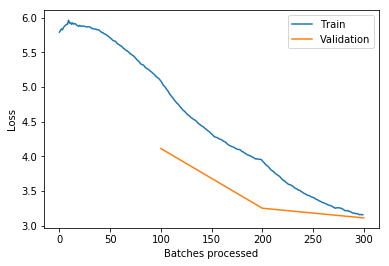

In [35]:
learn.recorder.plot_losses()

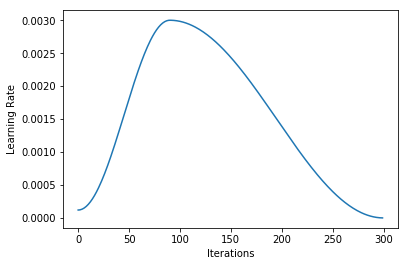

In [36]:
learn.recorder.plot_lr()

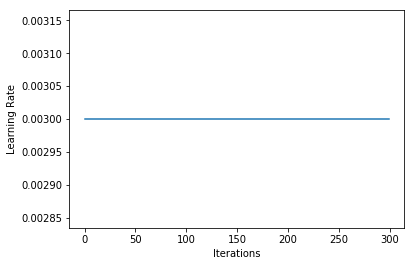

In [39]:
learn.recorder.plot_lr()

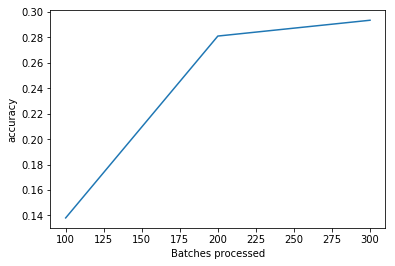

In [37]:
learn.recorder.plot_metrics()

In [40]:
learn.unfreeze()

In [41]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.995875,2.288067,0.404229,01:03
1,1.672283,1.550257,0.584577,01:04
2,0.992149,1.267188,0.654851,01:03


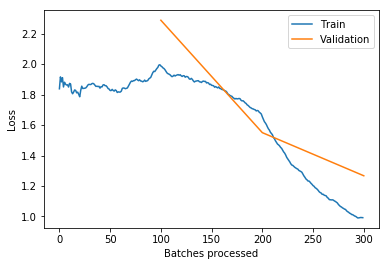

In [42]:
learn.recorder.plot_losses()

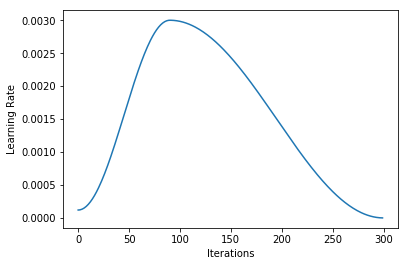

In [43]:
learn.recorder.plot_lr()

In [44]:
data = get_data(299,64)

In [45]:
learn.data = data 

In [46]:
learn.freeze()

In [47]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.031503,1.183661,0.672264,01:11
1,0.822682,1.089920,0.699005,01:13


In [48]:
learn.unfreeze()

In [49]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,1.208305,1.810458,0.536692,01:13
1,0.814365,0.956707,0.738184,01:14


In [50]:
data = get_data(380, 64)

In [51]:
learn.data = data

In [52]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.949314,1.453060,0.616294,01:27
1,0.609825,0.787233,0.768657,01:29


In [53]:
learn.unfreeze()
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.635063,1.541765,0.603234,01:26
1,0.672015,0.928569,0.750622,01:27
2,0.340148,0.719747,0.808458,01:28


In [54]:
learn.mixup()

Learner(data=ImageDataBunch;

Train: LabelList (6433 items)
x: ImageList
Image (3, 380, 380),Image (3, 380, 380),Image (3, 380, 380),Image (3, 380, 380),Image (3, 380, 380)
y: CategoryList
80,111,164,130,147
Path: data;

Valid: LabelList (1608 items)
x: ImageList
Image (3, 380, 380),Image (3, 380, 380),Image (3, 380, 380),Image (3, 380, 380),Image (3, 380, 380)
y: CategoryList
132,97,73,168,98
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inpl

In [55]:
learn.freeze()

In [56]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,2.168733,0.808071,0.775497,01:28
1,2.000250,0.792186,0.788557,01:28
